به نام خدا


پروژه یادگیری ماشین در فیزیک


فهیمه فخری
الهه ملاحیدر
یگانه بهاری
 

در این مرحله از پروژه داده های مقالات سایت آرکایو از سال 2014 تا 2019 را ذخیره کرده .چکیده های مقالات را به بردار تبدیل کرده و برای هر چکیده زیر شاخه آن مقاله را به عنوان لیبل در نظر گرفتیم.سپس به وسیله الگوریتم های کلسیفیکیشن زیرشاخه تعدادی از مقالات را به وسیله چکیده آن ها پیش بینی کردیم.
در ادامه هر مرحله را شرح میدهیم.

In [ ]:
import pandas as pd


In [5]:
def data_for_classification():
    my_dict = {}
    
    path = input("Enter the path of the json file(example --> D:/Machine Learning/data.json) -->")

    r = pd.read_json(path)
    
    my_dict["title"] = list(dict(r)["title"])
    my_dict["categories"] = list(dict(r)["categories"])
    my_dict["abstract"] = list(dict(r)["abstract"])
    
    return my_dict


ابتدا دیتای اصلی گرفته شده از سایت را میخوانیم و زیر شاخه هر مقاله را مشخص میکنیم.

In [6]:
path = 'C:/Users/asus/Desktop/Giant.json'
r = pd.read_json(path)
r

,identifier,datestamp,setSpec,id,created,updated,authors,title,categories,comments,journal-ref,doi,abstract,category,sub category
0,oai:arXiv.org:0801.3875,2015-08-03,physics,0801.3875,2008-01-24,2008-01-26,"{'keyname': ['Mandel', 'Beezley', 'Chakraborty...",Towards a Real-Time Data Driven Wildland Fire ...,physics.ao-ph cs.CE,"5 pages, 4 figures",IEEE International Symposium on Parallel and D...,10.1109/IPDPS.2008.4536414,A wildland fire model based on semi-empirica...,"[physics.ao-ph, cs.CE]","[physics, cs]"
1,oai:arXiv.org:1205.1956,2015-08-03,physics,1205.1956,2012-05-09,2015-07-31,"{'keyname': ['Masso'], 'forenames': ['E.']}",Slightly Massive Photon and Equivalence Principle,hep-ph,This paper has been withdrawn by the author du...,None,None,We show that in the Higgs model leading to a...,[hep-ph],[hep-ph]
2,oai:arXiv.org:1208.4703,2015-08-03,physics,1208.4703,2012-08-23,2015-07-31,"{'keyname': ['Baldsiefen', 'Cangi', 'Gross'], ...",Reduced Density Matrix Functional Theory at Fi...,cond-mat.other math-ph math.MP quant-ph,"11 pages, 1 table",None,None,We present an ab-initio approach for grand c...,"[cond-mat.other, math-ph, math.MP, quant-ph]","[cond-mat, math-ph, math, quant-ph]"
3,oai:arXiv.org:1210.3471,2015-08-03,physics,1210.3471,2012-10-12,None,"{'keyname': ['Rowan-Robinson', 'Gonzalez-Solar...",Revised SWIRE photometric redshifts,astro-ph.CO,"12 pages, 28 figures, accepted for publication...","MNRAS 428, 1959 (2013)",10.1093/mnras/sts163,We have revised the SWIRE Photometric Redshi...,[astro-ph.CO],[astro-ph]
4,oai:arXiv.org:1211.3252,2015-08-03,physics,1211.3252,2012-11-14,None,"{'keyname': ['Matsubara', 'Schmehl', 'Mannhart...",Giant third-order magneto-optical rotation in ...,cond-mat.str-el cond-mat.mtrl-sci,None,Phys. Rev. B 86 (2012) 195127,10.1103/PhysRevB.86.195127,A magnetization-induced rotation in the thir...,"[cond-mat.str-el, cond-mat.mtrl-sci]","[cond-mat, cond-mat]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
386290,oai:arXiv.org:1903.12134,2019-03-29,physics,1903.12,2019-03-28,None,"{'keyname': ['Jouan', 'Singh', 'Lesne', 'Vaz',...",Quantized conductance in a one-dimensional bal...,cond-mat.mes-hall,None,None,None,Electric-field effect control of two-dimensi...,[cond-mat.mes-hall],[cond-mat]
386291,oai:arXiv.org:1903.12148,2019-03-29,physics,1903.12,2019-03-28,None,"{'keyname': ['Şahin', 'Yurchyshyn', 'Kumar', '...",Magnetic filed dynamics and varying plasma emi...,astro-ph.SR,None,"Astrophysical Journal, 873:75 (11pp), 2019 Mar...",10.3847/1538-4357/ab04aa,In this study we report detailed observation...,[astro-ph.SR],[astro-ph]
386292,oai:arXiv.org:1903.12155,2019-03-29,physics,1903.12,2019-03-28,None,"{'keyname': ['Akao', 'Shirasaka', 'Jimbo', 'Er...",Theta-gamma cross-frequency coupling enables c...,q-bio.NC nlin.PS,"13 pages, 4 figures",None,None,Cross-frequency coupling (CFC) is thought to...,"[q-bio.NC, nlin.PS]","[q-bio, nlin]"
386293,oai:arXiv.org:1903.12162,2019-03-29,physics,1903.12,2019-03-28,None,"{'keyname': ['Djorwé', 'Pennec', 'Djafari-Rouh...",Balanced gain-loss induces collective dynamics...,cond-mat.mes-hall physics.optics,"9 pages, 7 figures. Comments are welcome!",None,None,We investigate collective nonlinear dynamics...,"[cond-mat.mes-hall, physics.optics]","[cond-mat, physics]"


ستون های اضافه دیتا برای این مرحله را حذف میکنیم

In [7]:
df_clean=r.drop(['identifier','datestamp','setSpec','created','id','comments','updated','doi','authors','journal-ref','categories','category','title'],axis=1)
df_clean

,abstract,sub category
0,A wildland fire model based on semi-empirica...,"[physics, cs]"
1,We show that in the Higgs model leading to a...,[hep-ph]
2,We present an ab-initio approach for grand c...,"[cond-mat, math-ph, math, quant-ph]"
3,We have revised the SWIRE Photometric Redshi...,[astro-ph]
4,A magnetization-induced rotation in the thir...,"[cond-mat, cond-mat]"
...,...,...
386290,Electric-field effect control of two-dimensi...,[cond-mat]
386291,In this study we report detailed observation...,[astro-ph]
386292,Cross-frequency coupling (CFC) is thought to...,"[q-bio, nlin]"
386293,We investigate collective nonlinear dynamics...,"[cond-mat, physics]"


In [8]:
df_clean=df_clean.rename(columns={'sub category': 'sub_cat'})
df_clean

,abstract,sub_cat
0,A wildland fire model based on semi-empirica...,"[physics, cs]"
1,We show that in the Higgs model leading to a...,[hep-ph]
2,We present an ab-initio approach for grand c...,"[cond-mat, math-ph, math, quant-ph]"
3,We have revised the SWIRE Photometric Redshi...,[astro-ph]
4,A magnetization-induced rotation in the thir...,"[cond-mat, cond-mat]"
...,...,...
386290,Electric-field effect control of two-dimensi...,[cond-mat]
386291,In this study we report detailed observation...,[astro-ph]
386292,Cross-frequency coupling (CFC) is thought to...,"[q-bio, nlin]"
386293,We investigate collective nonlinear dynamics...,"[cond-mat, physics]"


چکیده ها را تمیز کرده(کلمات اضافه و علایم نگارش را حذف میکنیم) و به بردار تبدیل میکنیم

In [9]:
import pandas as pd
#from gensim.models import Word2Vec
import numpy as np
from sklearn.decomposition import PCA,NMF
import matplotlib.pyplot as plt
from nltk import  stem, word_tokenize,download
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
#import pandasql as ps
from nltk import  stem, word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import codecs
import re

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
download('punkt')
download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stopw={'your', 'when', 'it', "hadn't", 'very', 'we', 'y', 'themselves', 'only', 'them', 'i', 'of', 'under', 'there', 'hasn', 'yourself', 'over', 'or', 'should', 'myself', 'll', 'being', 'after', "you'd", 'his', 'what', 'so', 'm', 'here', 'not', 'will', "won't", 'some', 's', 'by', 'any', 'don', 'an', 'aren', "wouldn't", "haven't", 'do', 'in', 'off', 'wouldn', 'who', 'yours', 'which', 'other', 'didn', 'shouldn', 'is', 'did', "you're", 'having', 'between', "needn't", 'shan', 'their', 'down', "weren't", "you'll", 'was', "didn't", 'whom', 're', 'against', 'into', 'while', 'doing', 'isn', 'the', 've', 'has', 'to', 'doesn', "hasn't", 'he', 'couldn', 'they', "it's", 'haven', 'himself', 'our', 'can', 'nor', 'were', 'ourselves', 'herself', 'own', 'had', 'hadn', 'have', 'below', 'she', 'because', 'wasn', 'won', "couldn't", 'those', "wasn't", 'most', "mustn't", 'if', 'during', 'same', 'where', 'on', 'again', "don't", 'yourselves', 'ours', 'through', 'am', 'up', 'how', 'me', "that'll", 'why', 'these', 'does', 'from', "you've", 'are', "she's", 'once', 'its', 'been', 'than', 'each', "doesn't", 'too', "should've", 'about', 'but', 'itself', 'be', 'until', 'hers', 'more', 't', "shan't", 'few', 'a', 'then', 'that', 'd', 'with', 'above', 'ain', 'all', 'you', "mightn't", 'needn', "shouldn't", 'him', 'mustn', 'and', 'o', 'such', 'mightn', 'just', 'this', 'at', 'now', "isn't", 'out', 'before', 'both', 'ma', 'my', 'her', "aren't", 'weren', 'further', 'as', 'for', 'theirs', 'no'}


In [13]:
compile_patterns = lambda patterns: [(re.compile(pattern), repl) for pattern, repl in patterns]

class PreprocessDescription(object):
    def __init__(self, lemmatizer_params, tokenizer_params):
        self.lemmatizer = stem.PorterStemmer(**lemmatizer_params)
        
        junk_chars_regex=r'[^a-zA-Z0-9\u0621-\u06CC\u0698\u067E\u0686\u06AF \u200c]'
        url_regex = r"""(?i)\b((?:[a-z][\w-]+:(?:/{1,3}|[a-z0-9%])|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'\".,<>?«»“”‘’]))"""
        RFC_5322_COMPLIANT_EMAIL_REGEX = r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)"
        
        remove_url=(url_regex, ' ')
        remove_email=(RFC_5322_COMPLIANT_EMAIL_REGEX, ' ')
        remove_junk_characters=(junk_chars_regex, ' ')
        self.compiled_patterns_before = compile_patterns([remove_url,remove_email])
        self.compiled_patterns_after = compile_patterns([remove_junk_characters])
        self.stopwords=stopw
        
    def preprocess(self, text):
        # html parser
        soup = BeautifulSoup(text, 'html.parser')
        for br in soup.find_all("br"):
            br.replace_with("\n ")
        text = soup.getText()
        text = text.lower()
        for pattern, repl in self.compiled_patterns_before:
            text = pattern.sub(repl, text)
        text = re.sub(r'[\u200c\s]*\s[\s\u200c]*', ' ', text)
        text = re.sub(r'[\u200c]+', '\u200c', text)
        
        for pattern, repl in self.compiled_patterns_after:
            text = pattern.sub(repl, text)
            
        ## tokenized_words
        tokenized_words = word_tokenize(text)
        ## lemmatized_data
        lemmatized_words = [self.lemmatizer.stem(word) for word in tokenized_words]
        lemmatized_witout_stopwords = [word for word in lemmatized_words if word not in self.stopwords]
        return lemmatized_witout_stopwords

In [14]:
preprocessDesc = PreprocessDescription(lemmatizer_params={},tokenizer_params={})


In [15]:
import time
start = time.time()
preprocessed_text = []

for index, row in df_clean.iterrows():
    res = preprocessDesc.preprocess(row['abstract'])
    preprocessed_text.append(" ".join(res))
    
df_clean['preprocessed_abstract']=preprocessed_text
print(time.time() - start)


2209.7088906764984


In [16]:
df_clean

,abstract,sub_cat,preprocessed_abstract
0,A wildland fire model based on semi-empirica...,"[physics, cs]",wildland fire model base semi empir relat spre...
1,We show that in the Higgs model leading to a...,[hep-ph],show higg model lead slightli massiv photon on...
2,We present an ab-initio approach for grand c...,"[cond-mat, math-ph, math, quant-ph]",present ab initio approach grand canon ensembl...
3,We have revised the SWIRE Photometric Redshi...,[astro-ph],revis swire photometr redshift catalogu take a...
4,A magnetization-induced rotation in the thir...,"[cond-mat, cond-mat]",magnet induc rotat third order nonlinear optic...
...,...,...,...
386290,Electric-field effect control of two-dimensi...,[cond-mat],electr field effect control two dimension elec...
386291,In this study we report detailed observation...,[astro-ph],thi studi report detail observ magnet environ ...
386292,Cross-frequency coupling (CFC) is thought to...,"[q-bio, nlin]",cross frequenc coupl cfc thought play import r...
386293,We investigate collective nonlinear dynamics...,"[cond-mat, physics]",investig collect nonlinear dynam blue detun op...


In [17]:
DIMENSION = 100
words=[]
for index,row in df_clean.iterrows():
    words.append(row['preprocessed_abstract'].split())

In [18]:
from gensim.models import Word2Vec


unable to import 'smart_open.gcs', disabling that module


In [19]:
w2v_model = Word2Vec(words,sg=1,iter=10,size=DIMENSION)


In [20]:
df_clean['w2v_vector'] = pd.Series(np.zeros((df_clean.shape[0])), index=df_clean.index)
b=[]

for index, row in df_clean.iterrows():
    a=np.zeros(DIMENSION)
    for word in row['preprocessed_abstract'].split():
        try:
            a = a  + w2v_model.wv[word]
        except:
            pass
    b.append(a)

df_clean['w2v_vector']=b
df_clean.head()

,abstract,sub_cat,preprocessed_abstract,w2v_vector
0,A wildland fire model based on semi-empirica...,"[physics, cs]",wildland fire model base semi empir relat spre...,"[-12.933845438994467, -2.664905859157443, -12...."
1,We show that in the Higgs model leading to a...,[hep-ph],show higg model lead slightli massiv photon on...,"[-5.791997896507382, 3.035850914893672, -1.795..."
2,We present an ab-initio approach for grand c...,"[cond-mat, math-ph, math, quant-ph]",present ab initio approach grand canon ensembl...,"[-11.386819799547084, 6.211032953578979, -12.3..."
3,We have revised the SWIRE Photometric Redshi...,[astro-ph],revis swire photometr redshift catalogu take a...,"[-14.372621327638626, -8.768086792901158, -15...."
4,A magnetization-induced rotation in the thir...,"[cond-mat, cond-mat]",magnet induc rotat third order nonlinear optic...,"[-1.429336885921657, 3.0959001891314983, -5.22..."


In [242]:
sub_list=[]
for i in df_clean['sub_cat']:
    sub_list.append(i[0])

In [251]:
df_clean['clean_cat']=sub_list

زیر شاخه هر چکیده را مشخص میکنیم

In [252]:
df_clean

,abstract,sub_cat,preprocessed_abstract,w2v_vector,clean_cat
0,A wildland fire model based on semi-empirica...,"[physics, cs]",wildland fire model base semi empir relat spre...,"[-12.933845438994467, -2.664905859157443, -12....",physics
1,We show that in the Higgs model leading to a...,[hep-ph],show higg model lead slightli massiv photon on...,"[-5.791997896507382, 3.035850914893672, -1.795...",hep-ph
2,We present an ab-initio approach for grand c...,"[cond-mat, math-ph, math, quant-ph]",present ab initio approach grand canon ensembl...,"[-11.386819799547084, 6.211032953578979, -12.3...",cond-mat
3,We have revised the SWIRE Photometric Redshi...,[astro-ph],revis swire photometr redshift catalogu take a...,"[-14.372621327638626, -8.768086792901158, -15....",astro-ph
4,A magnetization-induced rotation in the thir...,"[cond-mat, cond-mat]",magnet induc rotat third order nonlinear optic...,"[-1.429336885921657, 3.0959001891314983, -5.22...",cond-mat
...,...,...,...,...,...
386290,Electric-field effect control of two-dimensi...,[cond-mat],electr field effect control two dimension elec...,"[-23.371896388474852, 7.352063544996781, -24.0...",cond-mat
386291,In this study we report detailed observation...,[astro-ph],thi studi report detail observ magnet environ ...,"[-33.77909780992195, 23.532734685577452, -22.7...",astro-ph
386292,Cross-frequency coupling (CFC) is thought to...,"[q-bio, nlin]",cross frequenc coupl cfc thought play import r...,"[-58.265251450939104, 3.4988090652041137, -27....",q-bio
386293,We investigate collective nonlinear dynamics...,"[cond-mat, physics]",investig collect nonlinear dynam blue detun op...,"[-21.665655981225427, 5.277025977149606, -0.79...",cond-mat


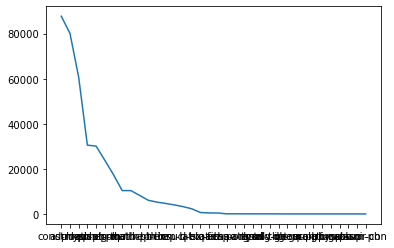

In [253]:
import matplotlib.pyplot as plt
df_cat_count = pd.DataFrame(df_clean['clean_cat'].value_counts())
df_cat_count.reset_index(inplace=True)
df_cat_count.columns = ['clean_cat','cat_counts']
df_cat_count
plt.plot(df_cat_count['clean_cat'],df_cat_count['cat_counts'])

نمودار نشان دهنده تعداد چکیده در هر یک از زیر شاخه ها(زیر شاخه هایی که تعداد چکیده آن ها محدود است را حذف میکنیم)

In [254]:
Data = df_clean.merge(df_cat_count,on='clean_cat')
Data

,abstract,sub_cat,preprocessed_abstract,w2v_vector,clean_cat,cat_counts
0,A wildland fire model based on semi-empirica...,"[physics, cs]",wildland fire model base semi empir relat spre...,"[-12.933845438994467, -2.664905859157443, -12....",physics,60610
1,We present few-femtosecond shadowgraphic sna...,"[physics, physics, physics]",present femtosecond shadowgraph snapshot taken...,"[-9.9330103546381, 10.613403514958918, -7.4501...",physics,60610
2,It is important to identify and reduce the g...,"[physics, nucl-ex]",import identifi reduc gamma radiat signific so...,"[-12.62926208274439, -0.7040283367969096, -12....",physics,60610
3,We propose a simple stochastic model describ...,"[physics, physics]",propos simpl stochast model describ posit depe...,"[-9.197438054834493, 0.4336396874859929, -7.67...",physics,60610
4,Rayleigh scattering poses an intrinsic limit...,"[physics, hep-ex, physics]",rayleigh scatter pose intrins limit transpar o...,"[-5.075774980708957, -5.866810740932124, -11.9...",physics,60610
...,...,...,...,...,...,...
386290,Lattice current algebras were introduced as ...,"[q-alg, hep-th, math]",lattic current algebra introduc regular left r...,"[-7.82639643130824, -4.368559826165438, -8.206...",q-alg,5
386291,We prove that the scalar and $2\times 2$ mat...,"[q-alg, math-ph, math, math]",prove scalar 2 time 2 matrix differenti oper p...,"[-3.932812558952719, -5.128147911280394, -9.02...",q-alg,5
386292,We study representation theory of Drinfel'd ...,"[q-alg, cond-mat, hep-th, math-ph, math, math]",studi represent theori drinfel twist term call...,"[-5.215453919256106, -6.334656922612339, -7.93...",q-alg,5
386293,Multiple-integral representations of the (sk...,"[q-alg, hep-th, math]",multipl integr represent skew macdonald symmet...,"[-0.6354087481740862, -1.6121741719543934, -2....",q-alg,5


In [255]:
df_100=Data[Data.cat_counts>1000]
df_100

,abstract,sub_cat,preprocessed_abstract,w2v_vector,clean_cat,cat_counts
0,A wildland fire model based on semi-empirica...,"[physics, cs]",wildland fire model base semi empir relat spre...,"[-12.933845438994467, -2.664905859157443, -12....",physics,60610
1,We present few-femtosecond shadowgraphic sna...,"[physics, physics, physics]",present femtosecond shadowgraph snapshot taken...,"[-9.9330103546381, 10.613403514958918, -7.4501...",physics,60610
2,It is important to identify and reduce the g...,"[physics, nucl-ex]",import identifi reduc gamma radiat signific so...,"[-12.62926208274439, -0.7040283367969096, -12....",physics,60610
3,We propose a simple stochastic model describ...,"[physics, physics]",propos simpl stochast model describ posit depe...,"[-9.197438054834493, 0.4336396874859929, -7.67...",physics,60610
4,Rayleigh scattering poses an intrinsic limit...,"[physics, hep-ex, physics]",rayleigh scatter pose intrins limit transpar o...,"[-5.075774980708957, -5.866810740932124, -11.9...",physics,60610
...,...,...,...,...,...,...
385015,Production of the (anti)hypertriton nuclei $...,[nucl-ex],product anti hypertriton nuclei rm 3 lambda h ...,"[-31.646826549898833, 9.503963796421885, -19.3...",nucl-ex,3231
385016,We report a new measurement of $D^0$-meson p...,"[nucl-ex, hep-ex]",report new measur 0 meson product mid rapid 1 ...,"[-36.35360133647919, 5.989517741807504, -34.90...",nucl-ex,3231
385017,The quark and gluon structure of the proton ...,"[nucl-ex, nucl-th]",quark gluon structur proton ha intens experime...,"[-17.224166378495283, 10.510868952376768, -16....",nucl-ex,3231
385018,Certain pear-shaped nuclei are expected to h...,"[nucl-ex, physics]",certain pear shape nuclei expect enhanc sensit...,"[-24.450021791039035, 8.706821842584759, -21.9...",nucl-ex,3231


تعداد زیر شاخه های نهایی و تعداد چکیده در هر کدام از آن ها برای الگوریتم های کلسیفیکیشن 

In [258]:
df_cat_count = pd.DataFrame(df_100['clean_cat'].value_counts())
df_cat_count.reset_index(inplace=True)
df_cat_count.columns = ['clean_cat','cat_counts']
df_cat_count

,clean_cat,cat_counts
0,cond-mat,87697
1,astro-ph,80062
2,physics,60610
3,hep-ph,30510
4,quant-ph,30077
5,hep-th,23828
6,gr-qc,17422
7,math,10356
8,math-ph,10338
9,nucl-th,8220


In [259]:
from sklearn.preprocessing import LabelBinarizer


In [260]:
y = LabelBinarizer().fit_transform(df_100.clean_cat)


In [261]:
list_=[]
for c in y:
    list_.append(c)

حال زیر شاخه ها را تبدیل به بردار کرده و سپس به عدد تبدیل میکنیم

In [263]:
df = (pd.DataFrame({'one_hot':list_}))
df

,one_hot
0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
4,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
...,...
384573,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384574,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384575,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384576,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [264]:
data_final=pd.concat([df_100,df],axis=1)


In [266]:
data_final.dropna()

,abstract,sub_cat,preprocessed_abstract,w2v_vector,clean_cat,cat_counts,one_hot
0,A wildland fire model based on semi-empirica...,"[physics, cs]",wildland fire model base semi empir relat spre...,"[-12.933845438994467, -2.664905859157443, -12....",physics,60610.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,We present few-femtosecond shadowgraphic sna...,"[physics, physics, physics]",present femtosecond shadowgraph snapshot taken...,"[-9.9330103546381, 10.613403514958918, -7.4501...",physics,60610.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,It is important to identify and reduce the g...,"[physics, nucl-ex]",import identifi reduc gamma radiat signific so...,"[-12.62926208274439, -0.7040283367969096, -12....",physics,60610.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3,We propose a simple stochastic model describ...,"[physics, physics]",propos simpl stochast model describ posit depe...,"[-9.197438054834493, 0.4336396874859929, -7.67...",physics,60610.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
4,Rayleigh scattering poses an intrinsic limit...,"[physics, hep-ex, physics]",rayleigh scatter pose intrins limit transpar o...,"[-5.075774980708957, -5.866810740932124, -11.9...",physics,60610.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
...,...,...,...,...,...,...,...
384573,The CBELSA/TAPS experiment with a longitudin...,[nucl-ex],cbelsa tap experi longitudin transvers polar t...,"[-10.296935763850342, 5.856681696081068, -12.0...",nucl-ex,3231.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384574,The photoproduction of $\eta^{'}$-mesons fro...,[nucl-ex],photoproduct eta meson differ nuclei ha measur...,"[-4.424932585563511, 1.5827641242649406, -8.67...",nucl-ex,3231.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384575,The measurements of flow harmonics $v_2$-$v_...,[nucl-ex],measur flow harmon v 2 v 6 use event plane two...,"[-16.984326497651637, -1.7221592250280082, -14...",nucl-ex,3231.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384576,Recent collective flow measurements includin...,[nucl-ex],recent collect flow measur includ higher momen...,"[-36.39547759015113, 8.415648974885698, -26.29...",nucl-ex,3231.0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


صورت نهایی دیتای بدست آمده برای پیاده سازی الگوریتم کلسیفیکیشن

In [382]:
data_final_clean=data_final.drop(['abstract','sub_cat','preprocessed_abstract','clean_cat','cat_counts'],axis=1)

In [383]:
data_final_clean = data_final_clean.dropna()

In [428]:
data_final_clean

,w2v_vector,one_hot
0,"[-12.933845438994467, -2.664905859157443, -12....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,"[-9.9330103546381, 10.613403514958918, -7.4501...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,"[-12.62926208274439, -0.7040283367969096, -12....","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3,"[-9.197438054834493, 0.4336396874859929, -7.67...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
4,"[-5.075774980708957, -5.866810740932124, -11.9...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
...,...,...
384573,"[-10.296935763850342, 5.856681696081068, -12.0...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384574,"[-4.424932585563511, 1.5827641242649406, -8.67...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384575,"[-16.984326497651637, -1.7221592250280082, -14...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384576,"[-36.39547759015113, 8.415648974885698, -26.29...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [429]:
data_final_clean.to_json(r'C:\Users\asus\Desktop\data\data_clean.json')


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from copy import deepcopy
from sklearn.preprocessing import normalize,LabelEncoder


In [2]:
path = 'C:/Users/asus/Desktop/data/data_clean.json'
r = pd.read_json(path)
r

,w2v_vector,one_hot
0,"[-12.933845439, -2.6649058592, -12.4313581297,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
1,"[-9.9330103546, 10.613403515, -7.4501811611, 3...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
2,"[-12.6292620827, -0.7040283368, -12.5240059556...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
3,"[-9.1974380548, 0.43363968750000004, -7.676824...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
4,"[-5.0757749807, -5.8668107409, -11.9917171951,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]"
...,...,...
384573,"[-10.2969357639, 5.8566816961, -12.067341404, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384574,"[-4.4249325856, 1.5827641243000001, -8.6796761...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384575,"[-16.9843264977, -1.722159225, -14.1680786479,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
384576,"[-36.3954775902, 8.4156489749, -26.2948491247,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"


In [3]:
X=r.drop(['one_hot'],axis=1)
y=r['one_hot']
X2=X['w2v_vector']

قسمتی از دیتا را برای تست و قسمتی را برای یادگیری جدا میکنیم

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3, random_state=101)

In [5]:
lb = LabelEncoder()
y_train = lb.fit_transform(y_train.astype(str))
y_test = lb.transform(y_test.astype(str))

In [6]:

X_train_normal = normalize(list(X_train))
X_test_normal= normalize(list(X_test))
X_train_normal

array([[-0.11883234,  0.02633098, -0.1279191 , ...,  0.16806907,
         0.0321831 ,  0.00687315],
       [-0.14377403,  0.05362094, -0.09201366, ...,  0.10246094,
         0.07549015, -0.10230112],
       [-0.148033  ,  0.11010884, -0.11564907, ...,  0.11773467,
         0.0668164 , -0.09140308],
       ...,
       [-0.17672357, -0.01521543, -0.13091938, ...,  0.13819342,
         0.02847971, -0.04253738],
       [-0.10259846,  0.02707162, -0.18754193, ...,  0.09010993,
         0.06225202, -0.06098582],
       [-0.18213739,  0.0096818 , -0.09136963, ...,  0.05376644,
         0.02869406, -0.05469807]])

In [8]:
y_train

array([14, 14, 14, ..., 15, 15, 14])

شروع به پیاده سازی الگوریتم های کلسیفیکیشن میکنیم و میزان درستی عملکرد آن ها را نمایش میدهیم

الگوریتم شماره 1 


logistic regression


الگوریتم مناسبی برای دیتای ما نیست

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logmodel=LogisticRegression(max_iter=200)

In [11]:
logmodel.fit(X_train_normal,y_train,)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

الگوریتم شماره 2

random forest

In [12]:
from sklearn.ensemble import RandomForestClassifier


In [13]:
clf=RandomForestClassifier(n_estimators=100)


In [14]:
clf.fit(X_train_normal,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [15]:
y_pred=clf.predict(X_test_normal)


In [16]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7769370276203782


In [18]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.79      0.75      0.77      8977
           1       0.73      0.13      0.22       714
           2       0.66      0.75      0.70     18031
           3       0.79      0.53      0.63      2478
           4       0.74      0.37      0.50       825
           5       0.70      0.28      0.40      1605
           6       0.48      0.37      0.42      3204
           7       0.60      0.47      0.53      3102
           8       0.72      0.73      0.73      7141
           9       0.77      0.85      0.81      9119
          10       0.91      0.38      0.54      1186
          11       0.85      0.63      0.73      1805
          12       0.69      0.67      0.68      5268
          13       0.74      0.25      0.38      1374
          14       0.80      0.89      0.84     26282
          15       0.93      0.94      0.93     24130

    accuracy                           0.78    115241
   macro avg       0.74   

In [43]:
mat=confusion_matrix(y_test,y_pred)


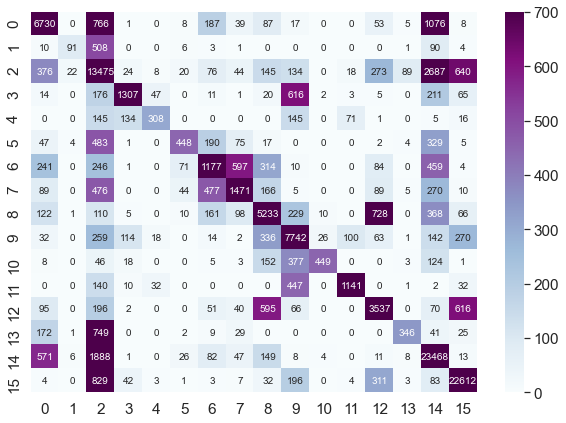

In [20]:
df_cm = pd.DataFrame(mat, range(16), range(16))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,fmt="d", annot_kws={"size": 10},cmap="BuPu",vmin=0, vmax=700) # font size

plt.show()

الگوریتم شماره 3

support vector machine

In [22]:
from sklearn import svm
clf_s= svm.SVC(kernel='linear')

In [23]:
clf_s.fit(X_train_normal,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
y_pred=clf_s.predict(X_test_normal)


In [25]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7820480558134691


In [26]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78      8977
           1       0.52      0.17      0.25       714
           2       0.67      0.72      0.69     18031
           3       0.75      0.64      0.69      2478
           4       0.66      0.51      0.58       825
           5       0.58      0.44      0.50      1605
           6       0.46      0.37      0.41      3204
           7       0.55      0.51      0.53      3102
           8       0.74      0.74      0.74      7141
           9       0.80      0.83      0.82      9119
          10       0.83      0.63      0.71      1186
          11       0.82      0.70      0.75      1805
          12       0.69      0.72      0.70      5268
          13       0.60      0.30      0.40      1374
          14       0.83      0.87      0.85     26282
          15       0.93      0.93      0.93     24130

    accuracy                           0.78    115241
   macro avg       0.70   

In [39]:
mat=confusion_matrix(y_test,y_pred)


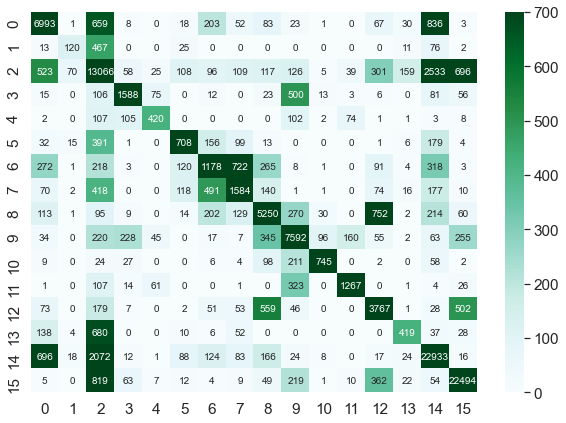

In [32]:
df_cm = pd.DataFrame(mat, range(16), range(16))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,fmt="d", annot_kws={"size": 10},cmap="BuGn",vmin=0, vmax=700) # font size

plt.show()

الگوریتم شماره 4

naive bayes

In [33]:
from sklearn.naive_bayes import GaussianNB


In [34]:
gnb = GaussianNB()


In [35]:
gnb.fit(X_train_normal, y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [36]:
y_pred = gnb.predict(X_test_normal)


In [37]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.6626894941904357


In [38]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.72      0.66      0.69      8977
           1       0.22      0.69      0.33       714
           2       0.60      0.48      0.53     18031
           3       0.50      0.61      0.55      2478
           4       0.27      0.68      0.39       825
           5       0.19      0.50      0.27      1605
           6       0.31      0.50      0.38      3204
           7       0.44      0.46      0.45      3102
           8       0.70      0.64      0.67      7141
           9       0.83      0.56      0.67      9119
          10       0.34      0.62      0.44      1186
          11       0.47      0.73      0.57      1805
          12       0.55      0.70      0.62      5268
          13       0.23      0.73      0.34      1374
          14       0.84      0.72      0.78     26282
          15       0.95      0.82      0.88     24130

    accuracy                           0.66    115241
   macro avg       0.51   

In [40]:
mat=confusion_matrix(y_test,y_pred)


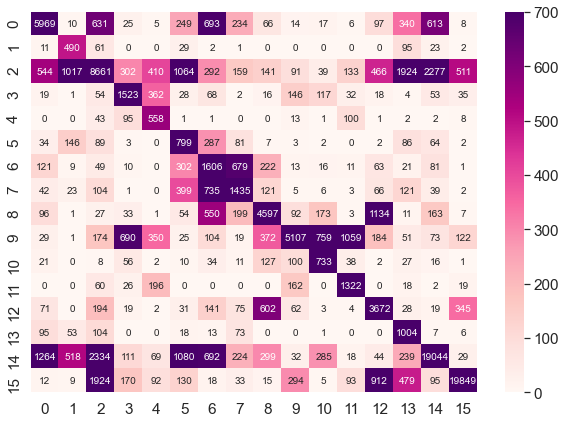

In [42]:
df_cm = pd.DataFrame(mat, range(16), range(16))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,fmt="d", annot_kws={"size": 10},cmap="RdPu",vmin=0, vmax=700) # font size

plt.show()

الگوریتم شماره 5

xgboost

In [44]:
from xgboost import XGBClassifier


C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [45]:
model = XGBClassifier()


In [46]:
model.fit(X_train_normal, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [47]:
y_pred = model.predict(X_test_normal)


In [48]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7878446039170087


In [49]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.78      0.78      8977
           1       0.55      0.34      0.42       714
           2       0.69      0.73      0.71     18031
           3       0.74      0.65      0.69      2478
           4       0.66      0.50      0.57       825
           5       0.61      0.46      0.52      1605
           6       0.46      0.39      0.42      3204
           7       0.55      0.51      0.53      3102
           8       0.74      0.74      0.74      7141
           9       0.80      0.83      0.82      9119
          10       0.82      0.63      0.71      1186
          11       0.81      0.71      0.76      1805
          12       0.69      0.69      0.69      5268
          13       0.57      0.37      0.44      1374
          14       0.83      0.88      0.85     26282
          15       0.93      0.94      0.94     24130

    accuracy                           0.79    115241
   macro avg       0.70   

In [50]:
mat=confusion_matrix(y_test,y_pred)


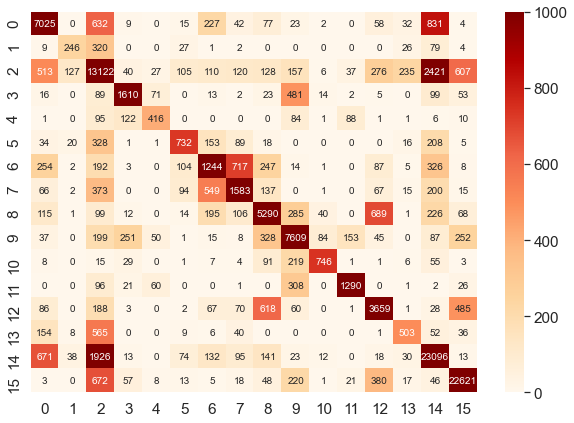

In [52]:
df_cm = pd.DataFrame(mat, range(16), range(16))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True,fmt="d", annot_kws={"size": 10},cmap="OrRd",vmin=0, vmax=1000) # font size

plt.show()